In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
import scipy.sparse.linalg as sla
import scipy.linalg as la
import scipy.sparse as sp
import scipy.constants as const
# from types import SimpleNamespace

# Hall effect

In [56]:
def hall_2D_square():
    square_lat = kwant.lattice.square(a=1., norbs=1)
    square_sys = kwant.Builder()
    t = 1.0
    def nn_hoppings(site1, site2, phi): 
        return -t*np.exp(-1j*phi*(site2.pos[0] - site1.pos[0])*(site1.pos[1] + site2.pos[1])/2)
    def onsite(site, u_imp):
        if np.random.rand() < 0.1:
            return 4*t + u_imp
        return 4*t
    square_sys[(square_lat(x, y) for x in range(20) for y in range(10))] = onsite
    square_sys[square_lat.neighbors()] = nn_hoppings
    # attach leads
    square_lead = kwant.Builder(kwant.TranslationalSymmetry((-1, 0)))
    square_lead[(square_lat(0, y) for y in range(10))] = onsite
    square_lead[square_lat.neighbors()] = nn_hoppings
    square_sys.attach_lead(square_lead)
    square_sys.attach_lead(square_lead.reversed())
    square_sys = square_sys.finalized()
    return square_sys

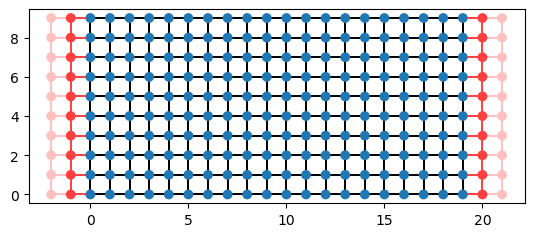

In [57]:
sys1 = hall_2D_square()
kwant.plot(sys1)
plt.show()

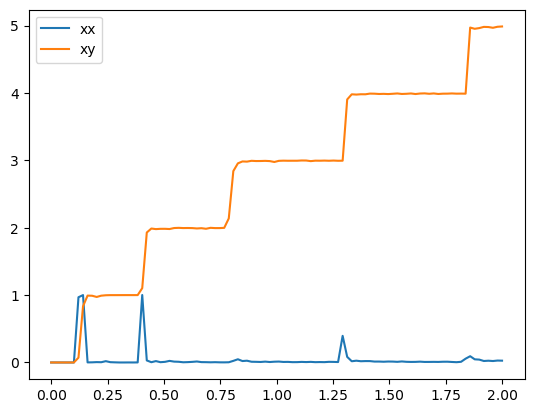

In [65]:
# calculate the conductance matrix
def conductance(sys, energy, p):
    matrix = kwant.smatrix(sys, energy, params=dict(phi = p, u_imp = 0.1))
    return [matrix.transmission(0, 0), matrix.transmission(0, 1)]
condxx = []
condxy = []
for energy in np.linspace(0, 2, 100):
    condxx.append(conductance(sys1, energy, 0.1)[0])
    condxy.append(conductance(sys1, energy, 0.1)[1])
plt.plot(np.linspace(0, 2, 100), condxx, label='xx')
plt.plot(np.linspace(0, 2, 100), condxy, label='xy')
plt.legend()
plt.show()

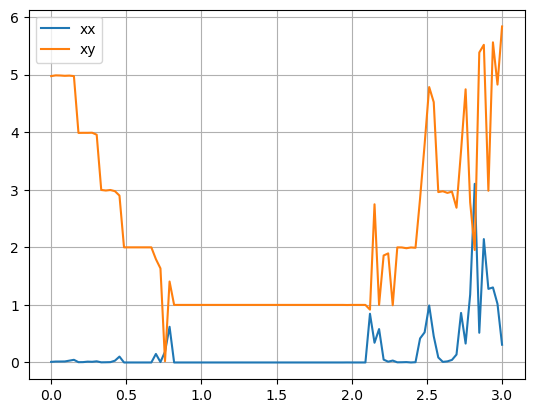

In [86]:
# calculate the conductance matrix
def conductance(sys, energy, p):
    matrix = kwant.smatrix(sys, energy, params=dict(phi = p, u_imp = 0.1))
    return [matrix.transmission(0, 0), matrix.transmission(0, 1)]
condxx = []
condxy = []
for b in np.linspace(0, 3, 100):
    condxx.append(conductance(sys1, 2, b)[0])
    condxy.append(conductance(sys1, 2, b)[1])
plt.plot(np.linspace(0, 3, 100), condxx, label='xx')
plt.plot(np.linspace(0, 3, 100), condxy, label='xy')
plt.legend()
plt.grid(True)
plt.show()

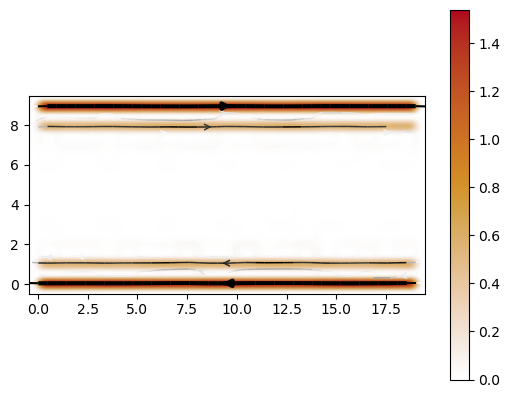

In [114]:
# get the state of the system in the Platue
psi_sq_1 = kwant.wave_function(sys1, energy=2, params=dict(phi=1.0, u_imp=0.1))(0)
psi_sq_2 = kwant.wave_function(sys1, energy=2, params=dict(phi=1.0, u_imp=0.1))(1)
current = kwant.operator.Current(sys1)(psi_sq_1[0] + psi_sq_2[0], params=dict(phi=1.0, u_imp=0.1))
kwant.plotter.current(sys1, current)
plt.show()

# Graphene Sample

In [134]:
def hall_2D_Graphene(L, W):
    lat = kwant.lattice.honeycomb(a=1., norbs=1)
    sys = kwant.Builder()
    t = 1.0
    def nn_hoppings(site1, site2, phi): 
        return -t*np.exp(-1j*phi*(site2.pos[0] - site1.pos[0])*(site1.pos[1] + site2.pos[1])/2)
    def onsite(site, u_imp):
        if np.random.rand() < 0.1:
            return u_imp
        return 0
    sys[lat.shape(lambda pos: -L/2<pos[0]<L/2 and -W/2<pos[1]<W/2, start=(0, 0))] = onsite
    sys[lat.neighbors()] = nn_hoppings

    for s in list(sys.sites()):
        if sum(1 for _ in sys.neighbors(s)) < 2: del sys[s] 
    
    # attach leads
    lead = kwant.Builder(kwant.TranslationalSymmetry((-1, 0)))
    lead[lat.shape(lambda pos: abs(pos[1]) < W/2, (0, 0))] = onsite
    lead[lat.neighbors()] = nn_hoppings
    sys.attach_lead(lead, add_cells=0)
    sys.attach_lead(lead.reversed(), add_cells=0)
    sys = sys.finalized()
    return sys

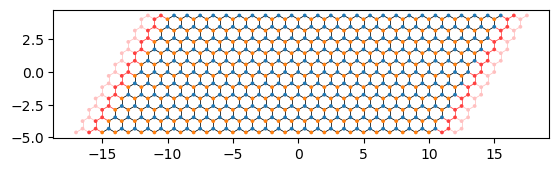

In [142]:
hall_g = hall_2D_Graphene(22, 9.8)
kwant.plot(hall_g)
plt.show()

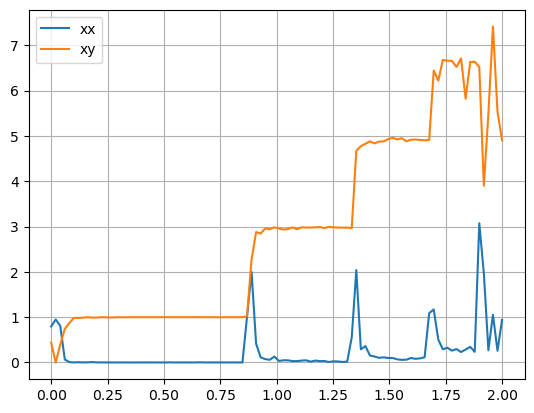

In [161]:
# calculate the conductance matrix
def conductance(sys, energy, p):
    matrix = kwant.smatrix(sys, energy, params=dict(phi = p, u_imp = 0.1))
    return [matrix.transmission(0, 0), matrix.transmission(0, 1)]

condxx = []
condxy = []
for energy in np.linspace(0.0001, 1, 100):
    condxx.append(conductance(hall_g, energy, 0.1)[0])
    condxy.append(conductance(hall_g, energy, 0.1)[1])
plt.plot(np.linspace(0, 2, 100), condxx, label='xx')
plt.plot(np.linspace(0, 2, 100), condxy, label='xy')
plt.legend()
plt.grid(True)
plt.show()

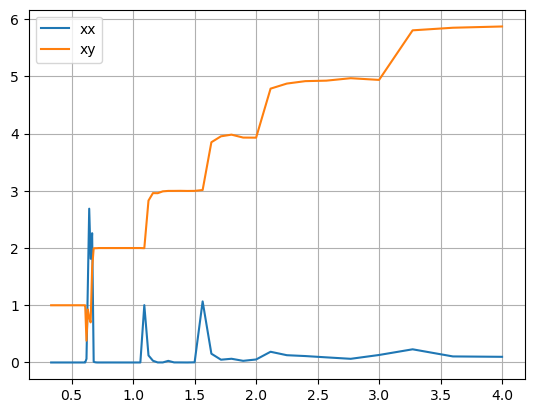

In [178]:
# calculate the conductance matrix
def conductance(sys, energy, p):
    matrix = kwant.smatrix(sys, energy, params=dict(phi = p, u_imp = 0.1))
    return [matrix.transmission(0, 0), matrix.transmission(0, 1)]

condxx = []
condxy = []
bs = np.linspace(1/4, 3, 100)
E11 = 2.0
for b in bs:
    condxx.append(conductance(hall_g, E11, b)[0])
    condxy.append(conductance(hall_g, E11, b)[1])
plt.plot(1/bs, condxx, label='xx')
plt.plot(1/bs, condxy, label='xy')
plt.legend()
plt.grid(True)
plt.show()